In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np

# membaca file csv
df = pd.read_csv('../data/day.csv', sep=',')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [39]:
# menghapus kolom yang tidak digunakan
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [40]:
y = 'cnt'
corr_matrix = df.corr(numeric_only=True)
print("Matriks Korelasi:\n", corr_matrix[y].sort_values(ascending=False))

Matriks Korelasi:
 cnt           1.000000
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


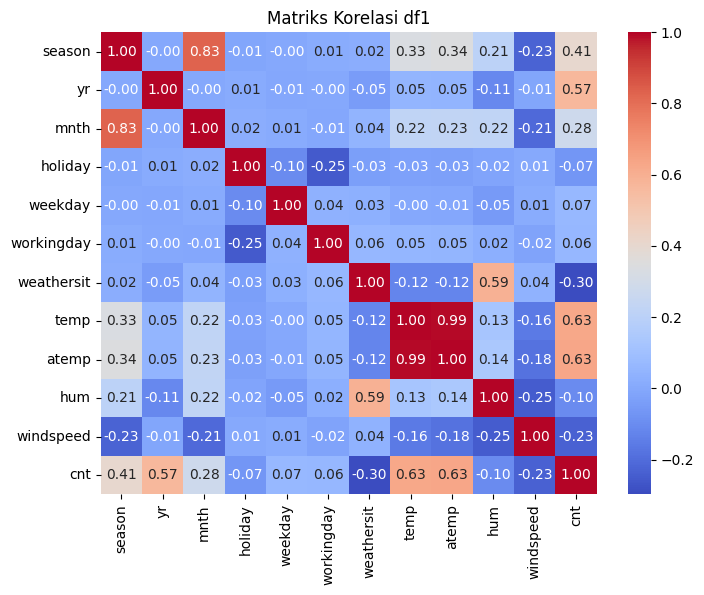

In [41]:
plt.figure(figsize=(8, 6))

# Buat heatmap grafik
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
# Tampilkan grafik
plt.show()

In [49]:
# misalkan target (Y) adalah cnt, variabel dependen
y = df["cnt"]

# fitur (X) adalah suhu yang dirasa dan tahun, variabel independen
X = df[['atemp', 'yr']]

# Split data 80% train : 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Cek jumlah data
print("Jumlah data train :",len(X_train))
print("Jumlah data test  :",len(X_test))

#cek apakah sudah ada constanta pada data training
X_train.head()

Jumlah data train : 584
Jumlah data test  : 147


,atemp,yr
682,0.323225,1
250,0.555361,0
336,0.310604,0
260,0.490537,0
543,0.640792,1


In [43]:
#tambahkan konstanta
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,atemp,yr
682,1.0,0.323225,1
250,1.0,0.555361,0
336,1.0,0.310604,0
260,1.0,0.490537,0
543,1.0,0.640792,1


In [48]:
#buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')
const = model.params['const']
x1_atemp = model.params['atemp']
x2_year = model.params['yr']

#print persamaan regresi
print(f"y = {const:.3f} + {x1_atemp:.3f}*x1 + {x2_year:.3f}*x2")

-----------------------------
const      27.115612
atemp    7259.204326
yr       2049.878522
dtype: float64
-----------------------------
y = 27.116 + 7259.204*x1 + 2049.879*x2


In [46]:
#tampilan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     610.9
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          1.40e-143
Time:                        21:23:14   Log-Likelihood:                -4911.5
No. Observations:                 584   AIC:                             9829.
Df Residuals:                     581   BIC:                             9842.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1156    147.508      0.184      0.8

In [47]:
#tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

#prediksi berat badan
y_pred_test = model.predict(X_test_const)

#buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Suhu yang dirasa": X_test["atemp"].to_numpy(),
    "Tahun": X_test["yr"].to_numpy(),
    "Jumlah Aktual Total Sepeda Sewaan": y_test.to_numpy(),
    "Jumlah Prediksi Total Sepeda Sewaan": y_pred_test
})

#1) selisih error (positif = overpredict)
hasil["Selisih error"] = hasil["Jumlah Aktual Total Sepeda Sewaan"] - hasil["Jumlah Prediksi Total Sepeda Sewaan"]

#2) akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Jumlah Aktual Total Sepeda Sewaan"].replace(0, np.nan) #antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Suhu yang dirasa,Tahun,Jumlah Aktual Total Sepeda Sewaan,Jumlah Prediksi Total Sepeda Sewaan,Selisih error,Akurasi (%)
703,0.469054,1,6606,5481.952960,1124.047040,82.984453
33,0.177878,0,1550,1318.368359,231.631641,85.056023
300,0.318812,0,3747,2341.437061,1405.562939,62.488312
456,0.417287,1,6041,5106.165729,934.834271,84.525173
633,0.544179,1,7538,6027.300685,1510.699315,79.958884
...,...,...,...,...,...,...
70,0.325750,0,2132,2391.801421,-259.801421,87.814192
192,0.739275,0,4258,5393.663890,-1135.663890,73.328702
328,0.380671,0,2792,2790.484182,1.515818,99.945709
165,0.587754,0,5180,4293.741991,886.258009,82.890772
